## Himanshu

## DATA SCIENCE  AND BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION 

### #GRIPSEPTEMBER23  #TSF  #DATASCIENCE 

#### DATASET : Iris.CSV (https://bit.ly/3kXTdox)

### PREDICTION USING DECISION TREE ALGORITHM

> Import Important Libraries 

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,f1_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

> read the data file and covert it to dataframe and then use it as dataframe

In [73]:
df = pd.read_csv("Iris.csv")
df.drop(columns="Id",inplace=True)

> checking the shape of the dataframe

In [74]:
print(df.shape)

(150, 5)


> checking information about variables or columns

In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


> checking descriptive analysis of numerical data 

In [76]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


> checking descriptive analysis of categorical data

In [77]:
print(df["Species"].describe())

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object


> checking null values count and visualize them 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


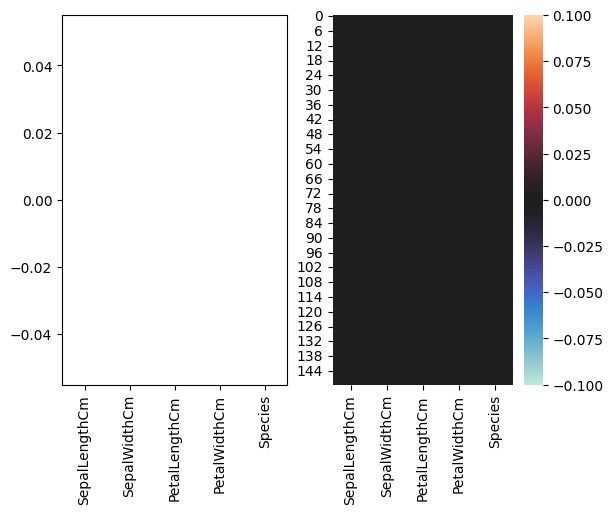

In [78]:
print(df.isnull().sum())
plt.subplots()
plt.subplot(1,2,1)
df.isnull().sum().plot(kind="bar")
plt.subplot(1,2,2)
sns.heatmap(data=df.isnull(),cmap="icefire")
plt.show()

> conclusion that no null value in dataset 

> handling target variable i.e Species

> checking count of unique values

In [79]:
print(df["Species"].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


> as values are uniformly distributed so no further checking needed 

> checking outliers

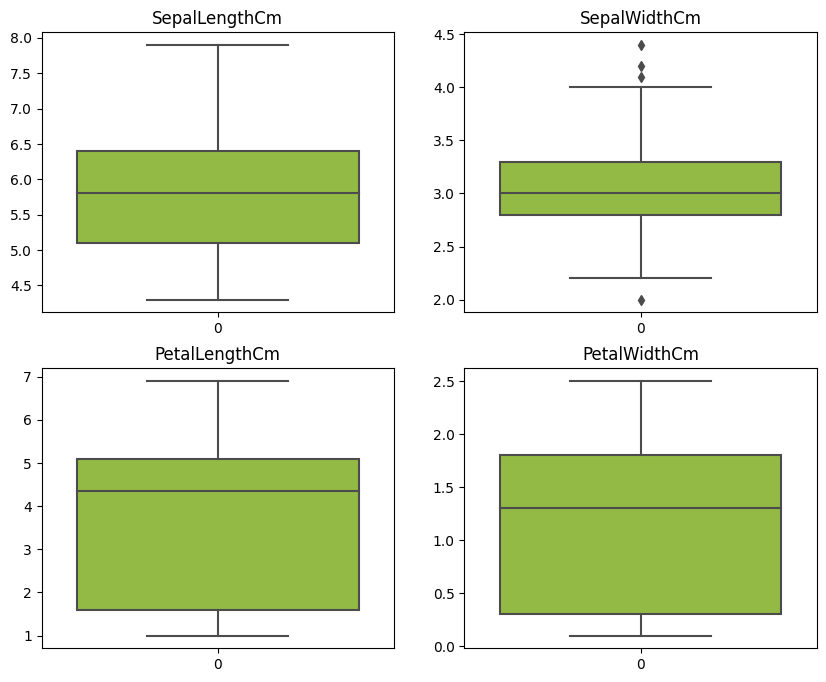

In [80]:
plt.subplots(figsize=(10,8))
for i,a in enumerate(df.drop(columns="Species").columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df[a],color="yellowgreen")
    plt.title(a)
plt.show()

> treating outliers 

In [81]:
def outlier_treatment(data,how):
    low = data.quantile(.25)-1.5*(data.quantile(.75)-data.quantile(.25))
    up = data.quantile(.75)+1.5*(data.quantile(.75)-data.quantile(.25))
    if how == "mode":
        data[data>up],data[data<low]=data.mode(),data.mode()
    elif how == "mean":
        data[data>up],data[data<low]=data.mean(),data.mean()
    elif how == "lim":
        data[data>up],data[data<low]=up,low
        
    elif how == "median":
        data[data>up],data[data<low]=data.median(),data.median()
    else:
        None
    return data

> after checking box plot outlier was detected in sepal width in cm columns so treatment for that 

In [82]:
df["SepalWidthCm"] = outlier_treatment(data=df["SepalWidthCm"],how="lim")

> after treatment visuaize outlier

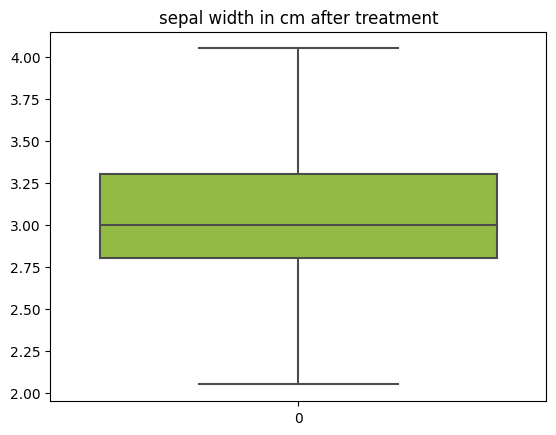

In [83]:
sns.boxplot(df["SepalWidthCm"],color="yellowgreen")
plt.title("sepal width in cm after treatment")
plt.show()

> checking relation between target and independent variables 

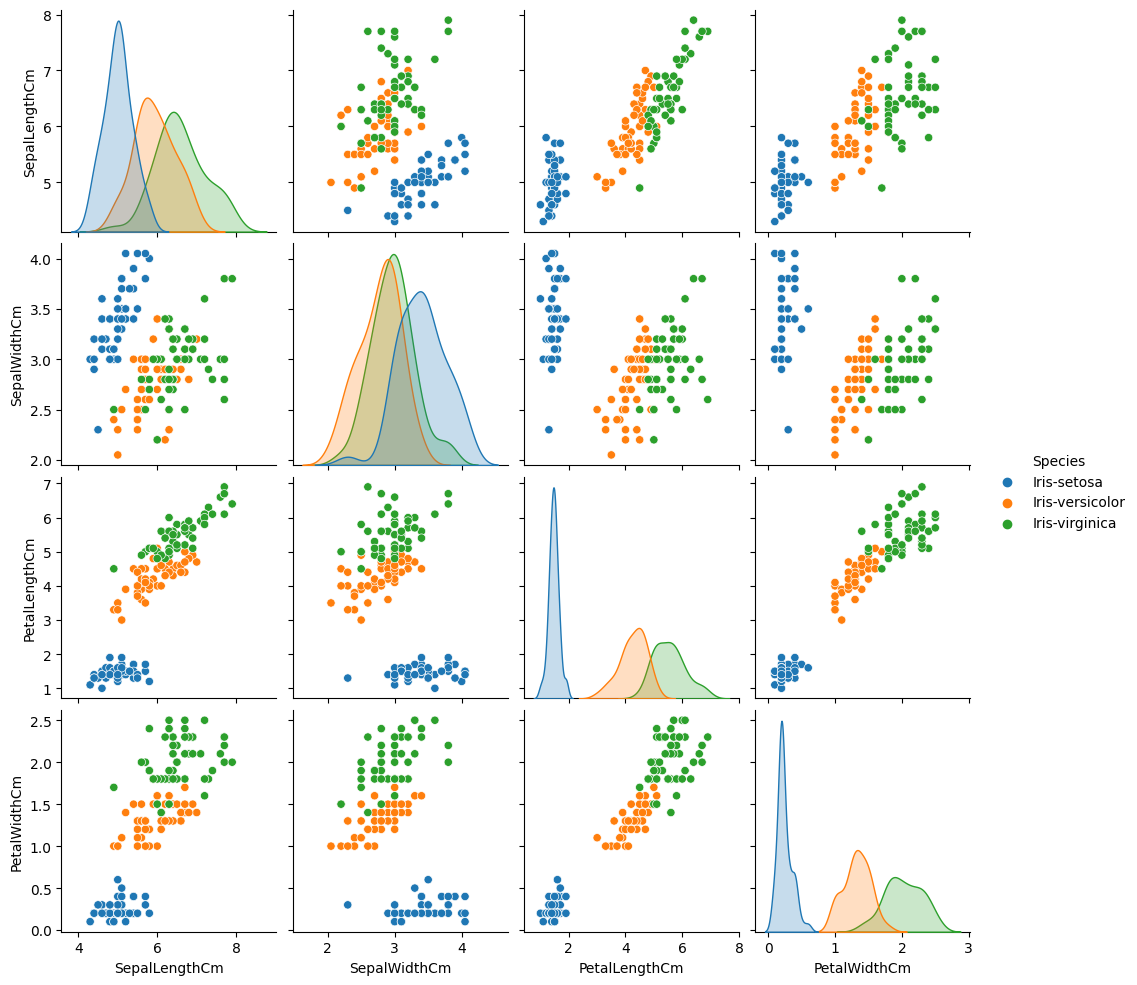

In [84]:
x = df.drop(columns="Species")
y = df["Species"]
sns.pairplot(data=df,hue="Species")
plt.show()

> now splitiing data to test and train 

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


> feature scalling

> apply standard scaler

In [86]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

> creating Decision Tree calsscification model for prediction

In [87]:
dc = DecisionTreeClassifier(criterion="gini",splitter="best",random_state=0)
dc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

> predicting the test set

In [88]:
y_dc_pred = dc.predict(x_test)

> checking metrics

> metrics score

In [89]:
print("Accuracy Score : ",accuracy_score(y_test,y_dc_pred))
print("Precision Score : ",precision_score(y_test,y_dc_pred,average="weighted"))
print("F1 Score : ",f1_score(y_test,y_dc_pred,average="weighted"))
print("Recall Score : ",recall_score(y_test,y_dc_pred,average="weighted"))

Accuracy Score :  1.0
Precision Score :  1.0
F1 Score :  1.0
Recall Score :  1.0


> confusion matrix

In [90]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_dc_pred))

Confusion Matrix 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


> display confusion matrix 

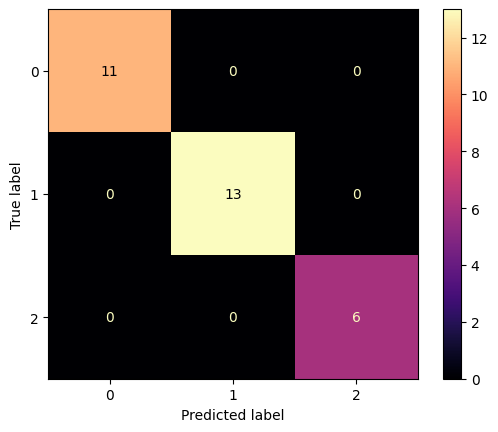

In [91]:
conf_dis = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_dc_pred))
conf_dis.plot(cmap="magma")
plt.show()

> Visualize Decision Tree

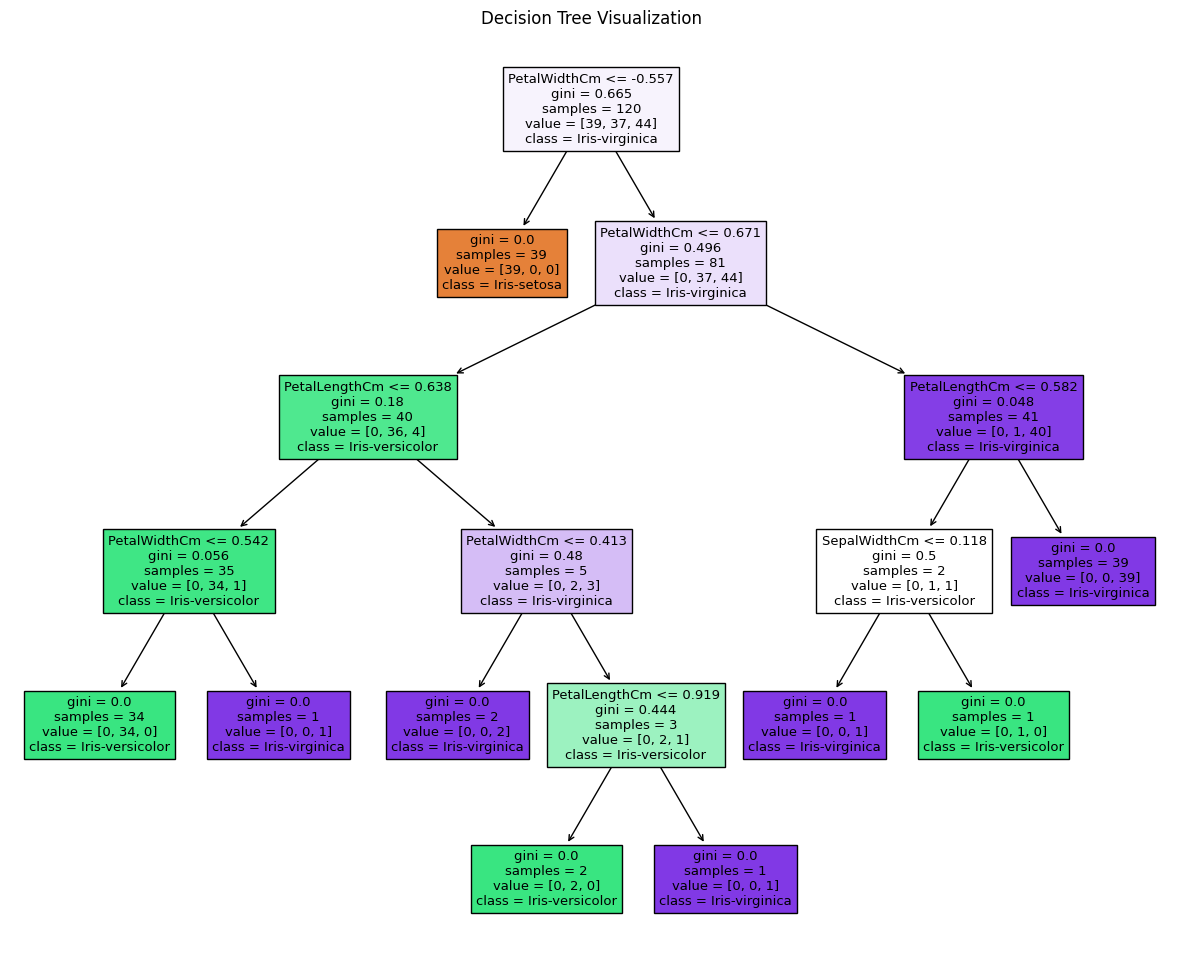

In [92]:
plt.figure(figsize=(15,12))
tree.plot_tree(dc,feature_names=df.columns,class_names=y.unique(),filled=True)
plt.title("Decision Tree Visualization")
plt.show()